In [62]:
import pandas as pd
import glob
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Data Pre-clean

In [12]:
# Path pattern for the files
file_pattern = '2023_*.csv'

# Reading all the files and combining them into a single DataFrame
files = glob.glob(file_pattern)
combined_df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)

/var/folders/lf/whbz839s4qj5n66gcnd5bqbh0000gn/T/ipykernel_3169/3970668463.py:6: DtypeWarning: Columns (11,13,86,93,94,101) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
/var/folders/lf/whbz839s4qj5n66gcnd5bqbh0000gn/T/ipykernel_3169/3970668463.py:6: DtypeWarning: Columns (11,13,57,78,85,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
/var/folders/lf/whbz839s4qj5n66gcnd5bqbh0000gn/T/ipykernel_3169/3970668463.py:6: DtypeWarning: Columns (11,13,86,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
/var/folders/lf/whbz839s4qj5n66gcnd5bqbh0000gn/T/ipykernel_3169/3970668463.py:6: DtypeWarning: Columns (11,13,86,93) have mixed types. Specify dtype option 

In [13]:
combined_df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2023,2,6,4,7,2023-06-04,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2023,2,6,1,4,2023-06-01,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2023,2,6,2,5,2023-06-02,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2023,2,6,1,4,2023-06-01,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2023,2,6,2,5,2023-06-02,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6674019,2023,3,8,1,2,2023-08-01,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
6674020,2023,3,8,1,2,2023-08-01,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
6674021,2023,3,8,1,2,2023-08-01,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
6674022,2023,3,8,1,2,2023-08-01,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [16]:
combined_df.to_csv('combined_2023.csv', index=False)

In [20]:
pd.set_option('display.max_columns', None)
combined_df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Originally_Scheduled_Code_Share_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,IATA_Code_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2023,2,6,4,7,2023-06-04,DL,DL_CODESHARE,19790,DL,4628,NaN,NaN,NaN,NaN,9E,20363,9E,N920XJ,4628,11423,1142308,31423,DSM,"Des Moines, IA",IA,19,Iowa,61,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1033,1053.0,20.0,20.0,1.0,1.0,1000-1059,17.0,1110.0,1424.0,15.0,1415,1439.0,24.0,24.0,1.0,1.0,1400-1459,0.0,NaN,0.0,162.0,166.0,134.0,1.0,1031.0,5,20.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2023,2,6,1,4,2023-06-01,DL,DL_CODESHARE,19790,DL,4628,NaN,NaN,NaN,NaN,9E,20363,9E,N341PQ,4628,14576,1457607,34576,ROC,"Rochester, NY",NY,36,New York,22,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1001,956.0,-5.0,0.0,0.0,-1.0,1000-1059,15.0,1011.0,1100.0,16.0,1119,1116.0,-3.0,0.0,0.0,-1.0,1100-1159,0.0,NaN,0.0,78.0,80.0,49.0,1.0,254.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2023,2,6,2,5,2023-06-02,DL,DL_CODESHARE,19790,DL,4628,NaN,NaN,NaN,NaN,9E,20363,9E,N602LR,4628,14576,1457607,34576,ROC,"Rochester, NY",NY,36,New York,22,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1001,956.0,-5.0,0.0,0.0,-1.0,1000-1059,9.0,1005.0,1051.0,11.0,1119,1102.0,-17.0,0.0,0.0,-2.0,1100-1159,0.0,NaN,0.0,78.0,66.0,46.0,1.0,254.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2023,2,6,1,4,2023-06-01,DL,DL_CODESHARE,19790,DL,4629,NaN,NaN,NaN,NaN,9E,20363,9E,N908XJ,4629,12397,1239703,32397,ITH,"Ithaca/Cortland, NY",NY,36,New York,22,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,1452,1447.0,-5.0,0.0,0.0,-1.0,1400-1459,11.0,1458.0,1544.0,12.0,1559,1556.0,-3.0,0.0,0.0,-1.0,1500-1559,0.0,NaN,0.0,67.0,69.0,46.0,1.0,189.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [28]:
# Dropping irrelevant columns based on the initial inspection
columns_to_drop = [
    'Year', 'FlightDate', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 
    'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'Originally_Scheduled_Code_Share_Airline', 
    'DOT_ID_Originally_Scheduled_Code_Share_Airline', 'IATA_Code_Originally_Scheduled_Code_Share_Airline',
    'Flight_Num_Originally_Scheduled_Code_Share_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 
    'Flight_Number_Marketing_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginState', 
    'OriginStateFips', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestStateFips', 
    'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'Cancelled', 'CancellationCode', 'Diverted', 
    'FirstDepTime', 'TotalAddGTime', 'LongestAddGTime', 'DivAirportLandings',
    'DivReachedDest', 'DivActualElapsedTime', 'DivArrDelay', 'DivDistance',
    'Div1Airport', 'Div1AirportID', 'Div1AirportSeqID', 'Div1WheelsOn', 'Div1TotalGTime',
    'Div1LongestGTime', 'Div1WheelsOff', 'Div1TailNum', 'Div2Airport', 'Div2AirportID',
    'Div2AirportSeqID', 'Div2WheelsOn', 'Div2TotalGTime', 'Div2LongestGTime', 'Div2WheelsOff',
    'Div2TailNum', 'Div3Airport', 'Div3AirportID', 'Div3AirportSeqID', 'Div3WheelsOn',
    'Div3TotalGTime', 'Div3LongestGTime', 'Div3WheelsOff', 'Div3TailNum', 'Div4Airport',
    'Div4AirportID', 'Div4AirportSeqID', 'Div4WheelsOn', 'Div4TotalGTime', 'Div4LongestGTime',
    'Div4WheelsOff', 'Div4TailNum', 'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID',
    'Div5WheelsOn', 'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum',
    'Duplicate', 'Unnamed: 119'
]

# Dropping the selected columns
cleaned_flights_df = combined_df.drop(columns=columns_to_drop, errors='ignore')

# Displaying the cleaned DataFrame structure
cleaned_flights_df.head()

,Quarter,Month,DayofMonth,DayOfWeek,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2,6,4,7,9E,N920XJ,4628,DSM,"Des Moines, IA",Iowa,LGA,"New York, NY",1033,1053.0,20.0,20.0,1.0,1.0,1000-1059,17.0,1110.0,1424.0,15.0,1415,1439.0,24.0,24.0,1.0,1.0,1400-1459,162.0,166.0,134.0,1.0,1031.0,5,20.0,0.0,4.0,0.0,0.0
1,2,6,1,4,9E,N341PQ,4628,ROC,"Rochester, NY",New York,LGA,"New York, NY",1001,956.0,-5.0,0.0,0.0,-1.0,1000-1059,15.0,1011.0,1100.0,16.0,1119,1116.0,-3.0,0.0,0.0,-1.0,1100-1159,78.0,80.0,49.0,1.0,254.0,2,NaN,NaN,NaN,NaN,NaN
2,2,6,2,5,9E,N602LR,4628,ROC,"Rochester, NY",New York,LGA,"New York, NY",1001,956.0,-5.0,0.0,0.0,-1.0,1000-1059,9.0,1005.0,1051.0,11.0,1119,1102.0,-17.0,0.0,0.0,-2.0,1100-1159,78.0,66.0,46.0,1.0,254.0,2,NaN,NaN,NaN,NaN,NaN
3,2,6,1,4,9E,N908XJ,4629,ITH,"Ithaca/Cortland, NY",New York,JFK,"New York, NY",1452,1447.0,-5.0,0.0,0.0,-1.0,1400-1459,11.0,1458.0,1544.0,12.0,1559,1556.0,-3.0,0.0,0.0,-1.0,1500-1559,67.0,69.0,46.0,1.0,189.0,1,NaN,NaN,NaN,NaN,NaN
4,2,6,2,5,9E,N929XJ,4629,ITH,"Ithaca/Cortland, NY",New York,JFK,"New York, NY",1452,1448.0,-4.0,0.0,0.0,-1.0,1400-1459,13.0,1501.0,1547.0,7.0,1559,1554.0,-5.0,0.0,0.0,-1.0,1500-1559,67.0,66.0,46.0,1.0,189.0,1,NaN,NaN,NaN,NaN,NaN


In [30]:
cleaned_flights_df.to_csv('cleaned_flights_df.csv', index=False)

In [32]:
cleaned_flights_df

,Quarter,Month,DayofMonth,DayOfWeek,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2,6,4,7,9E,N920XJ,4628,DSM,"Des Moines, IA",Iowa,LGA,"New York, NY",1033,1053.0,20.0,20.0,1.0,1.0,1000-1059,17.0,1110.0,1424.0,15.0,1415,1439.0,24.0,24.0,1.0,1.0,1400-1459,162.0,166.0,134.0,1.0,1031.0,5,20.0,0.0,4.0,0.0,0.0
1,2,6,1,4,9E,N341PQ,4628,ROC,"Rochester, NY",New York,LGA,"New York, NY",1001,956.0,-5.0,0.0,0.0,-1.0,1000-1059,15.0,1011.0,1100.0,16.0,1119,1116.0,-3.0,0.0,0.0,-1.0,1100-1159,78.0,80.0,49.0,1.0,254.0,2,NaN,NaN,NaN,NaN,NaN
2,2,6,2,5,9E,N602LR,4628,ROC,"Rochester, NY",New York,LGA,"New York, NY",1001,956.0,-5.0,0.0,0.0,-1.0,1000-1059,9.0,1005.0,1051.0,11.0,1119,1102.0,-17.0,0.0,0.0,-2.0,1100-1159,78.0,66.0,46.0,1.0,254.0,2,NaN,NaN,NaN,NaN,NaN
3,2,6,1,4,9E,N908XJ,4629,ITH,"Ithaca/Cortland, NY",New York,JFK,"New York, NY",1452,1447.0,-5.0,0.0,0.0,-1.0,1400-1459,11.0,1458.0,1544.0,12.0,1559,1556.0,-3.0,0.0,0.0,-1.0,1500-1559,67.0,69.0,46.0,1.0,189.0,1,NaN,NaN,NaN,NaN,NaN
4,2,6,2,5,9E,N929XJ,4629,ITH,"Ithaca/Cortland, NY",New York,JFK,"New York, NY",1452,1448.0,-4.0,0.0,0.0,-1.0,1400-1459,13.0,1501.0,1547.0,7.0,1559,1554.0,-5.0,0.0,0.0,-1.0,1500-1559,67.0,66.0,46.0,1.0,189.0,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6674019,3,8,1,2,YX,N732YX,3406,EWR,"Newark, NJ",New Jersey,AVL,"Asheville, NC",2000,1954.0,-6.0,0.0,0.0,-1.0,2000-2059,21.0,2015.0,2138.0,9.0,2216,2147.0,-29.0,0.0,0.0,-2.0,2200-2259,136.0,113.0,83.0,1.0,583.0,3,NaN,NaN,NaN,NaN,NaN
6674020,3,8,1,2,YX,N733YX,3405,EWR,"Newark, NJ",New Jersey,SDF,"Louisville, KY",1657,1650.0,-7.0,0.0,0.0,-1.0,1600-1659,17.0,1707.0,1846.0,7.0,1922,1853.0,-29.0,0.0,0.0,-2.0,1900-1959,145.0,123.0,99.0,1.0,642.0,3,NaN,NaN,NaN,NaN,NaN
6674021,3,8,1,2,YX,N752YX,3404,EWR,"Newark, NJ",New Jersey,DTW,"Detroit, MI",1359,1404.0,5.0,5.0,0.0,0.0,1300-1359,73.0,1517.0,1636.0,12.0,1558,1648.0,50.0,50.0,1.0,3.0,1500-1559,119.0,164.0,79.0,1.0,488.0,2,0.0,0.0,50.0,0.0,0.0
6674022,3,8,1,2,YX,N651RW,3403,CHS,"Charleston, SC",South Carolina,IAD,"Washington, DC",1450,1442.0,-8.0,0.0,0.0,-1.0,1400-1459,18.0,1500.0,1609.0,9.0,1625,1618.0,-7.0,0.0,0.0,-1.0,1600-1659,95.0,96.0,69.0,1.0,441.0,2,NaN,NaN,NaN,NaN,NaN


In [36]:
# Replacing NaN values in specific columns with 0
delay_columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
cleaned_flights_df[delay_columns] = cleaned_flights_df[delay_columns].fillna(0)

# Display the first few rows to confirm the changes
cleaned_flights_df

,Quarter,Month,DayofMonth,DayOfWeek,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2,6,4,7,9E,N920XJ,4628,DSM,"Des Moines, IA",Iowa,LGA,"New York, NY",1033,1053.0,20.0,20.0,1.0,1.0,1000-1059,17.0,1110.0,1424.0,15.0,1415,1439.0,24.0,24.0,1.0,1.0,1400-1459,162.0,166.0,134.0,1.0,1031.0,5,20.0,0.0,4.0,0.0,0.0
1,2,6,1,4,9E,N341PQ,4628,ROC,"Rochester, NY",New York,LGA,"New York, NY",1001,956.0,-5.0,0.0,0.0,-1.0,1000-1059,15.0,1011.0,1100.0,16.0,1119,1116.0,-3.0,0.0,0.0,-1.0,1100-1159,78.0,80.0,49.0,1.0,254.0,2,0.0,0.0,0.0,0.0,0.0
2,2,6,2,5,9E,N602LR,4628,ROC,"Rochester, NY",New York,LGA,"New York, NY",1001,956.0,-5.0,0.0,0.0,-1.0,1000-1059,9.0,1005.0,1051.0,11.0,1119,1102.0,-17.0,0.0,0.0,-2.0,1100-1159,78.0,66.0,46.0,1.0,254.0,2,0.0,0.0,0.0,0.0,0.0
3,2,6,1,4,9E,N908XJ,4629,ITH,"Ithaca/Cortland, NY",New York,JFK,"New York, NY",1452,1447.0,-5.0,0.0,0.0,-1.0,1400-1459,11.0,1458.0,1544.0,12.0,1559,1556.0,-3.0,0.0,0.0,-1.0,1500-1559,67.0,69.0,46.0,1.0,189.0,1,0.0,0.0,0.0,0.0,0.0
4,2,6,2,5,9E,N929XJ,4629,ITH,"Ithaca/Cortland, NY",New York,JFK,"New York, NY",1452,1448.0,-4.0,0.0,0.0,-1.0,1400-1459,13.0,1501.0,1547.0,7.0,1559,1554.0,-5.0,0.0,0.0,-1.0,1500-1559,67.0,66.0,46.0,1.0,189.0,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6674019,3,8,1,2,YX,N732YX,3406,EWR,"Newark, NJ",New Jersey,AVL,"Asheville, NC",2000,1954.0,-6.0,0.0,0.0,-1.0,2000-2059,21.0,2015.0,2138.0,9.0,2216,2147.0,-29.0,0.0,0.0,-2.0,2200-2259,136.0,113.0,83.0,1.0,583.0,3,0.0,0.0,0.0,0.0,0.0
6674020,3,8,1,2,YX,N733YX,3405,EWR,"Newark, NJ",New Jersey,SDF,"Louisville, KY",1657,1650.0,-7.0,0.0,0.0,-1.0,1600-1659,17.0,1707.0,1846.0,7.0,1922,1853.0,-29.0,0.0,0.0,-2.0,1900-1959,145.0,123.0,99.0,1.0,642.0,3,0.0,0.0,0.0,0.0,0.0
6674021,3,8,1,2,YX,N752YX,3404,EWR,"Newark, NJ",New Jersey,DTW,"Detroit, MI",1359,1404.0,5.0,5.0,0.0,0.0,1300-1359,73.0,1517.0,1636.0,12.0,1558,1648.0,50.0,50.0,1.0,3.0,1500-1559,119.0,164.0,79.0,1.0,488.0,2,0.0,0.0,50.0,0.0,0.0
6674022,3,8,1,2,YX,N651RW,3403,CHS,"Charleston, SC",South Carolina,IAD,"Washington, DC",1450,1442.0,-8.0,0.0,0.0,-1.0,1400-1459,18.0,1500.0,1609.0,9.0,1625,1618.0,-7.0,0.0,0.0,-1.0,1600-1659,95.0,96.0,69.0,1.0,441.0,2,0.0,0.0,0.0,0.0,0.0


# Data Overview

In [78]:
outliers = cleaned_flights_df[cleaned_flights_df['ArrDelay']>1000]
outliers.

,Quarter,Month,DayofMonth,DayOfWeek,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsDelayed
1633,2,6,26,1,9E,N336PQ,4923,VLD,"Valdosta, GA",Georgia,ATL,"Atlanta, GA",1427,724.0,1017.0,1017.0,1.0,12.0,1400-1459,23.0,747.0,833.0,17.0,1545,850.0,1025.0,1025.0,1.0,12.0,1500-1559,78.0,86.0,46.0,1.0,208.0,1,1017.0,0.0,8.0,0.0,0.0,1
5847,2,6,25,7,9E,N176PQ,5078,JFK,"New York, NY",New York,CVG,"Cincinnati, OH",1455,951.0,1136.0,1136.0,1.0,12.0,1400-1459,145.0,1216.0,1409.0,17.0,1715,1426.0,1271.0,1271.0,1.0,12.0,1700-1759,140.0,275.0,113.0,1.0,589.0,3,0.0,0.0,788.0,0.0,483.0,1
8192,2,6,26,1,9E,N131EV,5160,ORF,"Norfolk, VA",Virginia,JFK,"New York, NY",1509,1007.0,1138.0,1138.0,1.0,12.0,1500-1559,17.0,1024.0,1119.0,10.0,1650,1129.0,1119.0,1119.0,1.0,12.0,1600-1659,101.0,82.0,55.0,1.0,290.0,2,0.0,0.0,1110.0,0.0,9.0,1
10339,2,6,26,1,9E,N319PQ,5244,SYR,"Syracuse, NY",New York,DTW,"Detroit, MI",1710,1338.0,1228.0,1228.0,1.0,12.0,1700-1759,16.0,1354.0,1506.0,8.0,1845,1514.0,1229.0,1229.0,1.0,12.0,1800-1859,95.0,96.0,72.0,1.0,374.0,2,0.0,0.0,1190.0,0.0,39.0,1
12842,2,6,25,7,9E,N354CA,5350,AEX,"Alexandria, LA",Louisiana,ATL,"Atlanta, GA",1618,920.0,1022.0,1022.0,1.0,12.0,1600-1659,11.0,931.0,1148.0,12.0,1907,1200.0,1013.0,1013.0,1.0,12.0,1900-1959,109.0,100.0,77.0,1.0,500.0,3,878.0,0.0,0.0,0.0,135.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6666908,3,8,12,6,YX,N823MD,5725,ORD,"Chicago, IL",Illinois,LGA,"New York, NY",1741,1132.0,1071.0,1071.0,1.0,12.0,1700-1759,23.0,1155.0,1433.0,8.0,2107,1441.0,1054.0,1054.0,1.0,12.0,2100-2159,146.0,129.0,98.0,1.0,733.0,3,1003.0,0.0,51.0,0.0,0.0,1
6666915,3,8,15,2,YX,N243JQ,5783,JAX,"Jacksonville, FL",Florida,JFK,"New York, NY",1207,1018.0,1331.0,1331.0,1.0,12.0,1200-1259,13.0,1031.0,1214.0,16.0,1455,1230.0,1295.0,1295.0,1.0,12.0,1400-1459,168.0,132.0,103.0,1.0,828.0,4,1202.0,0.0,0.0,0.0,93.0,1
6667547,3,8,29,2,YX,N865RW,3493,EYW,"Key West, FL",Florida,EWR,"Newark, NJ",1449,1128.0,1239.0,1239.0,1.0,12.0,1400-1459,20.0,1148.0,1422.0,30.0,1809,1452.0,1243.0,1243.0,1.0,12.0,1800-1859,200.0,204.0,154.0,1.0,1196.0,5,21.0,0.0,4.0,0.0,1218.0,1
6670971,3,8,14,1,YX,N730YX,3499,CVG,"Cincinnati, OH",Kentucky,ORD,"Chicago, IL",1246,627.0,1061.0,1061.0,1.0,12.0,1200-1259,13.0,640.0,627.0,6.0,1315,633.0,1038.0,1038.0,1.0,12.0,1300-1359,89.0,66.0,47.0,1.0,264.0,2,0.0,1038.0,0.0,0.0,0.0,1


There are 0.04% flights which delay > 1000 minutes.

In [109]:
cleaned_flights_df['ArrDelayMinutes'].mean()

15.386918172495271

The average delay time is 15.3 minutes.

/var/folders/lf/whbz839s4qj5n66gcnd5bqbh0000gn/T/ipykernel_3169/3734908428.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_flights_df['DelayRange'] = pd.cut(cleaned_flights_df['ArrDelay'], bins=bins, labels=labels, right=False)


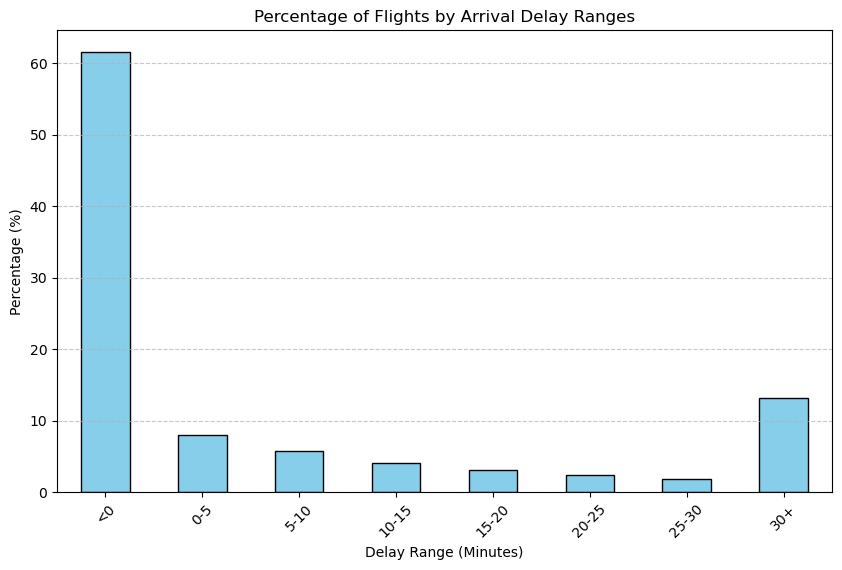

In [83]:
# Defining bins for delay ranges and corresponding labels
bins = [-float('inf'), 0, 5, 10, 15, 20, 25, 30, float('inf')]
labels = ['<0', '0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']

# Categorizing the 'ArrDelayMinutes' into bins
cleaned_flights_df['DelayRange'] = pd.cut(cleaned_flights_df['ArrDelay'], bins=bins, labels=labels, right=False)

# Calculating the percentage of each delay range
delay_percentage = cleaned_flights_df['DelayRange'].value_counts(normalize=True) * 100

# Plotting the delay percentage
plt.figure(figsize=(10, 6))
delay_percentage.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Flights by Arrival Delay Ranges')
plt.xlabel('Delay Range (Minutes)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/lf/whbz839s4qj5n66gcnd5bqbh0000gn/T/ipykernel_3169/3993050156.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_flights_df['DelayRange'] = pd.cut(cleaned_flights_df['ArrDelay'], bins=bins, labels=labels, right=False)


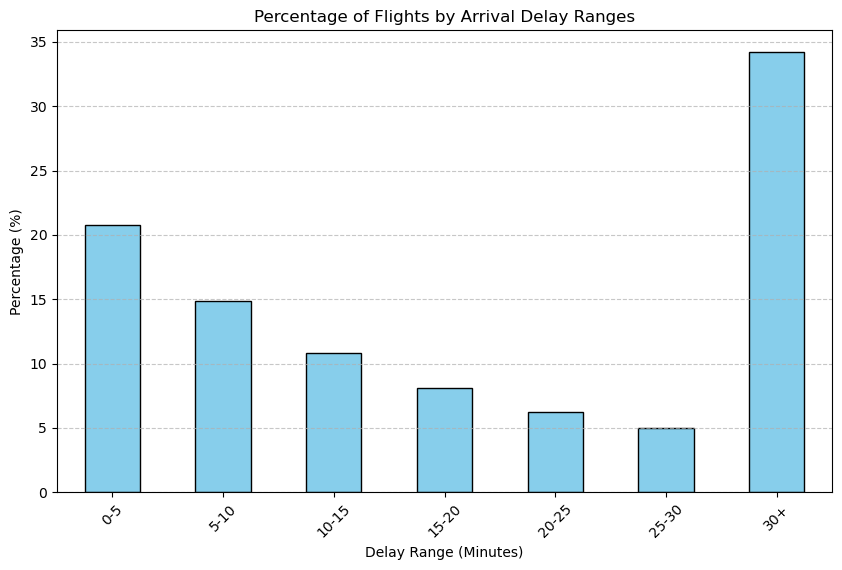

In [89]:
# Defining bins for delay ranges and corresponding labels
bins = [0, 5, 10, 15, 20, 25, 30, float('inf')]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']

# Categorizing the 'ArrDelayMinutes' into bins
cleaned_flights_df['DelayRange'] = pd.cut(cleaned_flights_df['ArrDelay'], bins=bins, labels=labels, right=False)

# Calculating the percentage of each delay range
delay_percentage = cleaned_flights_df['DelayRange'].value_counts(normalize=True) * 100

# Plotting the delay percentage
plt.figure(figsize=(10, 6))
delay_percentage.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Flights by Arrival Delay Ranges')
plt.xlabel('Delay Range (Minutes)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

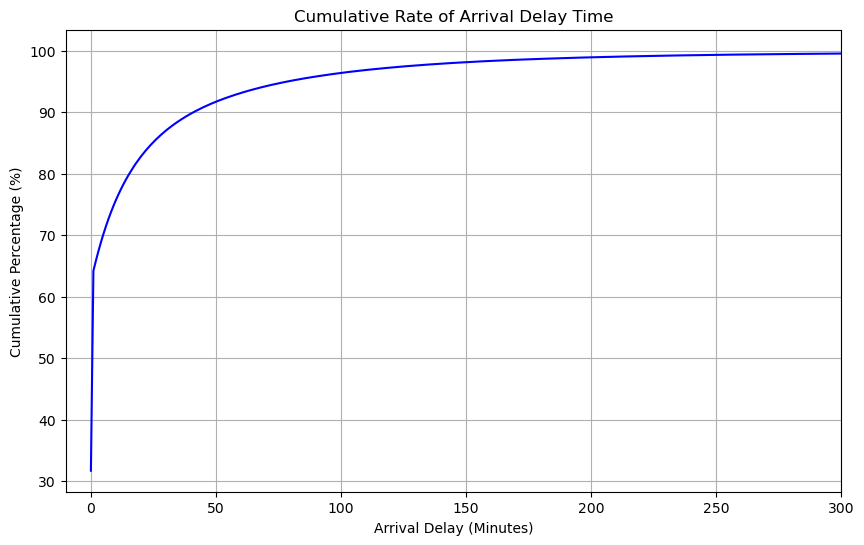

In [101]:
# Sorting the 'ArrDelayMinutes' values and calculating the cumulative percentage
sorted_delays = cleaned_flights_df['ArrDelayMinutes'].dropna().sort_values()
cumulative_percentage = sorted_delays.rank(pct=True) * 100

# Plotting the cumulative rate of delay time
plt.figure(figsize=(10, 6))
plt.plot(sorted_delays.values, cumulative_percentage, color='blue')
plt.title('Cumulative Rate of Arrival Delay Time')
plt.xlabel('Arrival Delay (Minutes)')
plt.ylabel('Cumulative Percentage (%)')
plt.xlim(-10, 300)
plt.grid(True)
plt.show()

<Figure size 1500x1000 with 0 Axes>

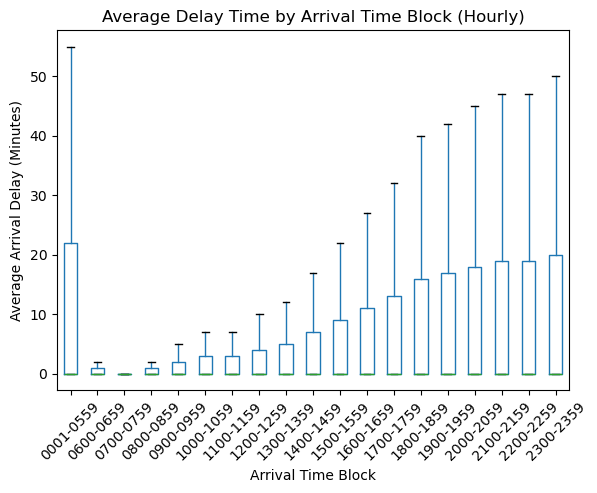

In [118]:
# Checking if 'ArrTimeBlk' column exists and preparing data for the box plot
if 'ArrTimeBlk' in cleaned_flights_df.columns:
    # Grouping the data by 'ArrTimeBlk' and calculating the average delay for each block
    grouped_data = cleaned_flights_df.groupby('ArrTimeBlk')['ArrDelayMinutes'].mean().reset_index()
    
    # Plotting the box plot for average delay time by each hour block
    plt.figure(figsize=(15, 10))
    cleaned_flights_df.boxplot(column='ArrDelayMinutes', by='ArrTimeBlk', grid=False, showfliers=False)
    plt.title('Average Delay Time by Arrival Time Block (Hourly)')
    plt.xlabel('Arrival Time Block')
    plt.ylabel('Average Arrival Delay (Minutes)')
    plt.xticks(rotation=45)
    plt.suptitle('')  # Suppress the default title to clean up the plot
    plt.show()
else:
    print("The 'ArrTimeBlk' column does not exist in the dataset.")


When we group the delay time by arrival hour, we can see that the later the flight, the more delays there are. That is caused by delay propagation.

# First model - linear regression

In [123]:
cleaned_flights_df

,Quarter,Month,DayofMonth,DayOfWeek,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsDelayed,DelayRange
0,2,6,4,7,9E,N920XJ,4628,DSM,"Des Moines, IA",Iowa,LGA,"New York, NY",1033,1053.0,20.0,20.0,1.0,1.0,1000-1059,17.0,1110.0,1424.0,15.0,1415,1439.0,24.0,24.0,1.0,1.0,1400-1459,162.0,166.0,134.0,1.0,1031.0,5,20.0,0.0,4.0,0.0,0.0,1,20-25
1,2,6,1,4,9E,N341PQ,4628,ROC,"Rochester, NY",New York,LGA,"New York, NY",1001,956.0,-5.0,0.0,0.0,-1.0,1000-1059,15.0,1011.0,1100.0,16.0,1119,1116.0,-3.0,0.0,0.0,-1.0,1100-1159,78.0,80.0,49.0,1.0,254.0,2,0.0,0.0,0.0,0.0,0.0,0,NaN
2,2,6,2,5,9E,N602LR,4628,ROC,"Rochester, NY",New York,LGA,"New York, NY",1001,956.0,-5.0,0.0,0.0,-1.0,1000-1059,9.0,1005.0,1051.0,11.0,1119,1102.0,-17.0,0.0,0.0,-2.0,1100-1159,78.0,66.0,46.0,1.0,254.0,2,0.0,0.0,0.0,0.0,0.0,0,NaN
3,2,6,1,4,9E,N908XJ,4629,ITH,"Ithaca/Cortland, NY",New York,JFK,"New York, NY",1452,1447.0,-5.0,0.0,0.0,-1.0,1400-1459,11.0,1458.0,1544.0,12.0,1559,1556.0,-3.0,0.0,0.0,-1.0,1500-1559,67.0,69.0,46.0,1.0,189.0,1,0.0,0.0,0.0,0.0,0.0,0,NaN
4,2,6,2,5,9E,N929XJ,4629,ITH,"Ithaca/Cortland, NY",New York,JFK,"New York, NY",1452,1448.0,-4.0,0.0,0.0,-1.0,1400-1459,13.0,1501.0,1547.0,7.0,1559,1554.0,-5.0,0.0,0.0,-1.0,1500-1559,67.0,66.0,46.0,1.0,189.0,1,0.0,0.0,0.0,0.0,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6674019,3,8,1,2,YX,N732YX,3406,EWR,"Newark, NJ",New Jersey,AVL,"Asheville, NC",2000,1954.0,-6.0,0.0,0.0,-1.0,2000-2059,21.0,2015.0,2138.0,9.0,2216,2147.0,-29.0,0.0,0.0,-2.0,2200-2259,136.0,113.0,83.0,1.0,583.0,3,0.0,0.0,0.0,0.0,0.0,0,NaN
6674020,3,8,1,2,YX,N733YX,3405,EWR,"Newark, NJ",New Jersey,SDF,"Louisville, KY",1657,1650.0,-7.0,0.0,0.0,-1.0,1600-1659,17.0,1707.0,1846.0,7.0,1922,1853.0,-29.0,0.0,0.0,-2.0,1900-1959,145.0,123.0,99.0,1.0,642.0,3,0.0,0.0,0.0,0.0,0.0,0,NaN
6674021,3,8,1,2,YX,N752YX,3404,EWR,"Newark, NJ",New Jersey,DTW,"Detroit, MI",1359,1404.0,5.0,5.0,0.0,0.0,1300-1359,73.0,1517.0,1636.0,12.0,1558,1648.0,50.0,50.0,1.0,3.0,1500-1559,119.0,164.0,79.0,1.0,488.0,2,0.0,0.0,50.0,0.0,0.0,1,30+
6674022,3,8,1,2,YX,N651RW,3403,CHS,"Charleston, SC",South Carolina,IAD,"Washington, DC",1450,1442.0,-8.0,0.0,0.0,-1.0,1400-1459,18.0,1500.0,1609.0,9.0,1625,1618.0,-7.0,0.0,0.0,-1.0,1600-1659,95.0,96.0,69.0,1.0,441.0,2,0.0,0.0,0.0,0.0,0.0,0,NaN


In [125]:
# Selecting the target column and the feature columns
target_column = 'ArrDelayMinutes'
features = cleaned_flights_df.drop(columns=['ArrDelayMinutes', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 
                                            'NASDelay', 'SecurityDelay','LateAircraftDelay',
                                            'IsDelayed'], errors='ignore').select_dtypes(include=[np.number])

# Dropping rows with missing values for simplicity
flights_data_clean = cleaned_flights_df.dropna(subset=[target_column])
X = flights_data_clean[features.columns]
y = flights_data_clean[target_column]

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(27.307394009741756, 0.9909118941573768)